In [17]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [18]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [19]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [20]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [21]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [22]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [23]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [24]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [25]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

'before groupby'

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


'after groupby'

,prcp
date,
2016-08-23,2.71
2016-08-24,9.33
2016-08-25,0.54
2016-08-26,0.10
2016-08-27,0.32


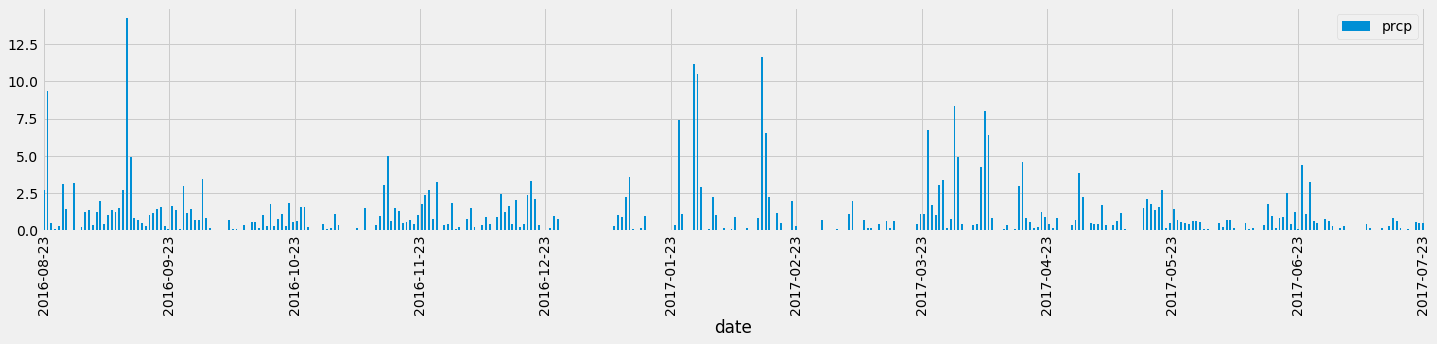

In [35]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores
prcp_query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23')

# Save the query results as a Pandas DataFrame and set the index to the date column

prcp_results = pd.read_sql(prcp_query.statement,engine)

prcp_results.set_index('date', inplace = True)
# Sort the dataframe by date
prcp_results.sort_values(by ='date', inplace= True)
display('before groupby',prcp_results.head())

#sum all the values for a date using groupby on date
sum_prcp_results = prcp_results.groupby('date').sum()
display('after groupby',sum_prcp_results.head())

#Prepare date labels
date_labels = []

#Running a for loop for last 4 months of 2016
for date in range(8, 13):
    date_labels.append(str(dt.date(2016,date,23)))
    
#Running a for loop for first 8 months of 2017
for date in range(1,9):
    date_labels.append(str(dt.date(2017,date,23)))
    
#X-ticks were overcrowded --> need to be binned for a nicer display
x_ticks =list(np.linspace(0, 365, num=12))
 
# Use Pandas Plotting with Matplotlib to plot the data
sum_prcp_results.plot(kind='bar', figsize=(20,5))
plt.xticks(ticks= x_ticks,labels = date_labels)    
plt.tight_layout()
plt.show()

In [36]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sum_prcp_results.describe()

,prcp
count,366.000000
mean,0.978907
std,1.776349
min,0.000000
25%,0.052500
50%,0.405000
75%,1.087500
max,14.280000


# Exploratory Station Analysis

In [39]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.station).count()

9

In [44]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc())
display(most_active_stations.all())
most_active_station = (most_active_stations.all())[0][0]
most_active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

'USC00519281'

In [52]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == most_active_station).first()[0]
print(f'The lowest temperature for the most active station {most_active_station} is {lowest_temp} deg.')
highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == most_active_station).first()[0]
print(f'The lowest temperature for the most active station {most_active_station} is {highest_temp} deg.')
average_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station).first()[0]
print(f'The lowest temperature for the most active station {most_active_station} is {round(average_temp,1)} deg.')

The lowest temperature for the most active station USC00519281 is 54.0 deg.
The lowest temperature for the most active station USC00519281 is 85.0 deg.
The lowest temperature for the most active station USC00519281 is 71.7 deg.


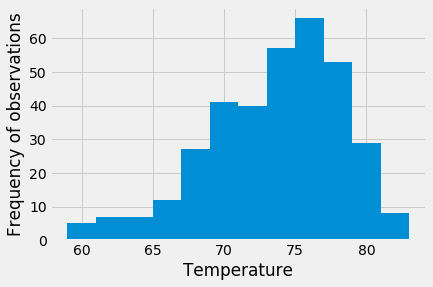

In [66]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station 
yearly_temp_data = session.query(Measurement.tobs).filter(Measurement.station == most_active_station).filter(Measurement.date >= '2016-08-23').all()

# # and plot the results as a histogram
yearly_temp_data = [item for temp_data in yearly_temp_data for item in temp_data]
plt.hist(yearly_temp_data,bins = 12)
plt.xlabel('Temperature')
plt.ylabel('Frequency of observations')
plt.show()

# Close session

In [67]:
# Close Session
session.close()